# Decision Tree
Build a decison tree to predict the quality of github profiles

In [1]:
#imports
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

/Users/conorosully/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#Read dataset
data = pd.read_csv('../data/gitrater.csv',index_col=0)
print(len(data))
data.head()

230


,repos,stars,followers,following,foll_ratio,lang,n_lang,org_flag,n_cont,last_cont,stab_cont,cont_repo_ratio,r1,r2,y
0,71,306,106,9,11.78,"{'Rust', 'Ruby', 'Shell', 'JavaScript', 'HTML'...",10,1,437,0,0.25,6,3.5,4.5,4.0
1,0,0,0,1,0.00,set(),0,0,1,159,0.00,0,0.0,0.0,0.0
2,12,1,182,0,0.00,"{'Ruby', 'Shell', 'JavaScript', 'PHP', 'CSS'}",5,0,433,3,0.23,36,4.0,3.0,4.0
3,13,31,0,17,0.00,"{'JavaScript', 'HTML', 'PHP'}",3,0,20,0,0.50,2,2.0,2.0,2.0
4,99,344,370,16,23.12,"{'Jupyter Notebook', 'Shell', 'JavaScript', 'H...",10,0,255,6,0.02,3,5.0,3.0,4.0


In [44]:
features = ['repos','stars','followers','following','foll_ratio','n_lang','org_flag','n_cont','last_cont','stab_cont','cont_repo_ratio']

In [45]:
X = data[features]
y = data['y']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30,random_state = 100)

In [31]:
# Fitting the model
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

             precision    recall  f1-score   support

        0.0       1.00      0.60      0.75         5
        1.0       0.55      0.86      0.67         7
        2.0       0.62      0.56      0.59         9
        3.0       0.50      0.20      0.29         5
        4.0       0.50      1.00      0.67         2
        5.0       1.00      1.00      1.00         2

avg / total       0.66      0.63      0.62        30



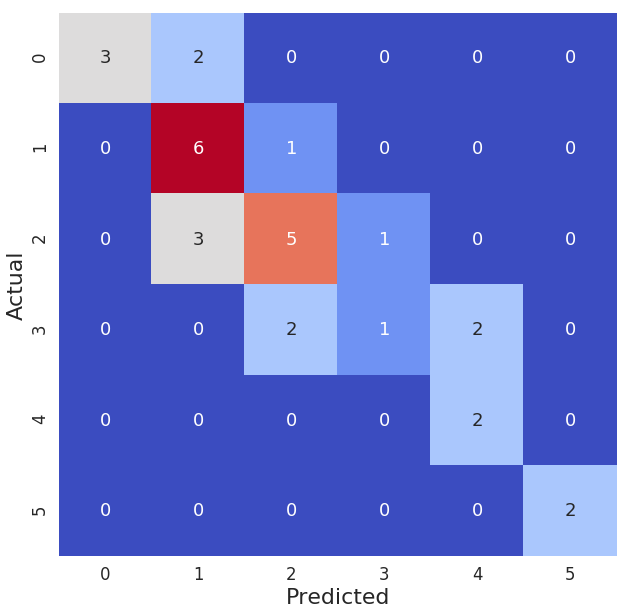

In [32]:
# Prediction and evaluation
predictions = rfc.predict(X_test)
print(classification_report(y_test,predictions))

#Create confusion matrix
lang = [0, 1, 2, 3, 4, 5]
conf_matrix = confusion_matrix(y_test,predictions)
conf_matrix_df = pd.DataFrame(conf_matrix,columns=lang,index=lang)

#Plot confusion matrix heatmap
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix_df,cmap='coolwarm',annot=True,fmt='.5g',cbar=False)
plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)

plt.savefig('../figures/model_eval.png',format='png',dpi=150)

In [34]:
importances = rfc.feature_importances_

In [70]:
features[0]

'repos'

In [73]:
features

['repos',
 'stars',
 'followers',
 'following',
 'foll_ratio',
 'n_lang',
 'org_flag',
 'n_cont',
 'last_cont',
 'stab_cont',
 'cont_repo_ratio']

In [74]:
indices = np.argsort(importances)[::-1]
labels = [features[i] for i in indices]
print(indices)
labels

[ 7 10  2  0  4  9  5  1  3  8  6]


['n_cont',
 'cont_repo_ratio',
 'followers',
 'repos',
 'foll_ratio',
 'stab_cont',
 'n_lang',
 'stars',
 'following',
 'last_cont',
 'org_flag']

In [75]:
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f+1 , indices[f], importances[indices[f]]))

Feature ranking:
1. feature 7 (0.223261)
2. feature 10 (0.116557)
3. feature 2 (0.116065)
4. feature 0 (0.109794)
5. feature 4 (0.076511)
6. feature 9 (0.075490)
7. feature 5 (0.073896)
8. feature 1 (0.066893)
9. feature 3 (0.063319)
10. feature 8 (0.060542)
11. feature 6 (0.017673)


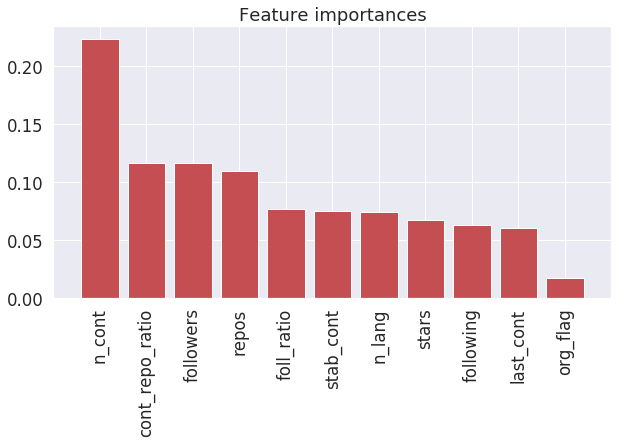

In [77]:
plt.figure(figsize=(10, 5), facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(ticks=range(X.shape[1]), labels=labels,rotation=90)

plt.xlim([-1, X.shape[1]])
plt.show()